In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV



def df_confusion(label,pred):
    """
    transfer confusion matrix to data frame
    :param label: ground truth label
    :param pred: predicted label
    :return: DataFrame
    """
    return pd.DataFrame(confusion_matrix(label, pred,labels=['G2',"M"]),columns=['pred_G2','pred_M'],index=['ground_true_G2','ground_true_M'])

def check_classifier(clf,x_train,x_test,y_train,y_test):
    """
    check the accuracy of selected classifier with train and test set, also get the confusion matrix to show the prediction label with ground truth label
    :param clf: classifier
    :param x_train: train features
    :param x_test: test features
    :param y_train: ground truth label of training set
    :param y_test:  ground truth label of test set
    :return: hemtmap of confusion matrix
    """
    clf_hp=make_pipeline(StandardScaler(),clf)
    clf_hp.fit(x_train,y_train)
    predicted_train = clf_hp.predict(x_train)
    accuracy_train = accuracy_score(y_train,predicted_train)
    print(f'the accuracy of model run with train data {accuracy_train}')
    predicted_test = clf_hp.predict(x_test)
    accuracy_test = accuracy_score(y_test,predicted_test)
    print(f'the accuracy of model run with test data {accuracy_test}')
    cm_train = df_confusion(y_train,predicted_train)
    cm_test = df_confusion(y_test, predicted_test)
    CM=[cm_train,cm_test]
    title=['train_data','test_data']
    fig, axs= plt.subplots(ncols=1,nrows=2,figsize=(8,5))
    for index,cm  in enumerate(CM):
        axs[index].set_title(f'{title[index]}')
        sns.heatmap(cm, annot=True,fmt='g',ax=axs[index])
    plt.show()

def preprecess_classifier(data,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'DAPI_total_norm',
       'area_cell_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed'):
    """
    preprocessing of data
    :param data: DataFrame
    :param features: the interesting columns using to classifier
    :param label: ground truth label
    :return: x_train,x_test,y_train,y_test
    """
    X,Y=data[features],data[[label]]
    x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=2/3,random_state=42,shuffle=True,stratify=Y)
    y_train=np.ravel(y_train)
    y_test=np.ravel(y_test)
    # define the classifier
    clf_svm = svm.SVC( random_state=24,C=10,gamma='auto',kernel='poly')
    clf_log=LogisticRegression(random_state=42,C=10,solver='newton-cg',max_iter=10000)
    clf_rf = RandomForestClassifier(random_state=11,n_estimators=40)
    clf_sgd=SGDClassifier(loss="log_loss", penalty="l2", max_iter=10000)
    x=[i for i in range(1,6)]
    # using the cross validation to compare different  clf

    CLF=[clf_svm,clf_log,clf_rf,clf_sgd]
    for clf in CLF:
        clf_tem=make_pipeline(StandardScaler(),clf)
        score=cross_val_score(clf_tem,x_train,y_train,cv=5)
        plt.plot(x, score, label =f"{clf}")
        print(f'the selected model: {clf}  Score:{score}  Mean:{score.mean()}')
    plt.legend()
    plt.show()
    return x_train,x_test,y_train,y_test

def merge_data(df1,df2,merge_clue,megre_columns):
    all_merged_df=pd.DataFrame()
    for i in df1[merge_clue].unique().tolist():

        merged_df = pd.merge(df1[df1[merge_clue]==i], df2[df2[merge_clue]==i],how='right',on=megre_columns).dropna()
        all_merged_df=pd.concat([all_merged_df,merged_df])
    return all_merged_df


In [2]:
df_ori=pd.read_csv('/Users/haoranyue/Desktop/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS/single_cell_data/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS_final_data.csv')
df=pd.read_csv('/Users/haoranyue/Downloads/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS_singlecell_cellcycle.csv')

In [3]:
df_all=merge_data(df1=df_ori,df2=df,merge_clue='well_id',megre_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle_detailed,cell_cycle
0,0.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,13.0,136.0,...,0.968335,-0.046422,0.949624,-0.074571,1.462911,0.548842,1.120828,0.164565,G2,G2/M
1,1.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,16.0,147.0,...,0.917730,-0.123858,0.929528,-0.105430,2.604441,1.380974,1.211483,0.276774,G1,G1
2,2.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,17.0,98.0,...,4.848917,2.277662,0.985389,-0.021235,1.033012,0.046856,0.807655,-0.308188,Late S,S
3,5.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,20.0,203.0,...,1.000066,0.000095,0.952695,-0.069913,1.938723,0.955107,1.673000,0.742438,Polyploid,Polyploid
4,4.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,19.0,130.0,...,1.003778,0.005440,0.969189,-0.045151,1.755076,0.811534,1.071380,0.099470,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,262.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,304.0,314.0,...,0.968910,-0.045565,0.985267,-0.021413,1.205830,0.270027,1.851099,0.888382,G2,G2/M
1783,261.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,303.0,246.0,...,2.431181,1.281657,1.023444,0.033433,1.647256,0.720065,1.450224,0.536276,Late S,S
1784,265.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,308.0,309.0,...,1.039146,0.055399,0.993885,-0.008849,1.224424,0.292103,1.821623,0.865224,G2,G2/M
1785,267.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,311.0,473.0,...,1.100063,0.137586,1.009845,0.014134,2.805569,1.488294,2.788439,1.479458,Polyploid,Polyploid


In [4]:
df_all.groupby('cell_cycle_detailed').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,22771,22771,22771,22771,22771,22771,22771,22771,22771,22771,...,22771,22771,22771,22771,22771,22771,22771,22771,22771,22771
G1,70081,70081,70081,70081,70081,70081,70081,70081,70081,70081,...,70081,70081,70081,70081,70081,70081,70081,70081,70081,70081
G2,26261,26261,26261,26261,26261,26261,26261,26261,26261,26261,...,26261,26261,26261,26261,26261,26261,26261,26261,26261,26261
Late S,14347,14347,14347,14347,14347,14347,14347,14347,14347,14347,...,14347,14347,14347,14347,14347,14347,14347,14347,14347,14347
M,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,...,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156
Polyploid,3982,3982,3982,3982,3982,3982,3982,3982,3982,3982,...,3982,3982,3982,3982,3982,3982,3982,3982,3982,3982
Polyploid (replicating),1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,...,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741
Sub-G1,1640,1640,1640,1640,1640,1640,1640,1640,1640,1640,...,1640,1640,1640,1640,1640,1640,1640,1640,1640,1640


In [5]:
data=pd.concat([df_all[df_all['cell_cycle_detailed']=="M"],df_all[df_all['cell_cycle_detailed']=="G2"].head(2156)])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell',
       'intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed']].sample(frac=1).reset_index(drop=True)

In [6]:
data

,cell_line,condition,label,area_nucleus,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,integrated_int_DAPI,area_cell,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,...,intensity_mean_Tub_cell,intensity_max_Tub_cyto,intensity_mean_Tub_cyto,nuclei_count,DAPI_total,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed
0,U2OS,siCdc27,110.0,217.0,23947.570626,12634.658977,2.741721e+06,416.0,23947.570626,8245.433384,...,25840.703022,41178.568913,16786.819129,1,2.741721e+06,3.886452,1.130260,0.648027,1.321173,M
1,MM231,NT,63.0,208.0,15771.792133,12332.197329,2.565097e+06,1062.0,15771.792133,3734.437468,...,11117.263025,23608.798643,9923.758375,1,2.565097e+06,4.198883,0.995407,2.216279,1.714207,G2
2,RPE-1,siCdc27,118.0,251.0,12814.976088,7970.603592,2.000622e+06,1927.0,12814.976088,2070.497553,...,7091.912998,17336.983843,7150.647449,1,2.000622e+06,3.764393,1.270028,1.327033,1.479700,G2
3,U2OS,siCdc27,131.0,88.0,41097.603611,24611.658158,2.165826e+06,271.0,41097.603611,11163.238859,...,22882.941413,49341.235026,16606.841510,1,2.165826e+06,3.070107,1.150255,0.422152,0.535775,M
4,MM231,NT,314.0,263.0,14797.655370,10502.355148,2.762119e+06,1942.0,14797.655370,2707.471361,...,8975.953648,17724.259458,8658.790019,1,2.762119e+06,4.521395,0.987098,4.052745,2.167483,G2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,MM231,siCdc27,207.0,93.0,38064.300294,21298.082212,1.980722e+06,236.0,38064.300294,11262.130081,...,16695.647723,33438.852458,12167.262201,1,1.980722e+06,3.242302,0.971084,0.492507,0.766448,M
4308,RPE-1,siCdc27,247.0,258.0,27006.667709,9839.508551,2.538593e+06,1647.0,27006.667709,2592.854928,...,6924.323129,15015.681482,6059.713776,1,2.538593e+06,4.776647,1.160658,1.134210,1.520967,M
4309,RPE-1,siCdc27,253.0,232.0,14617.787835,8930.486827,2.071873e+06,2161.0,14617.787835,2042.967748,...,7022.694057,21059.437818,7137.354797,1,2.071873e+06,3.898460,1.053200,1.488178,1.367691,G2
4310,MM231,siCdc27,26.0,105.0,32682.291088,19394.004573,2.036370e+06,268.0,32682.291088,10556.659874,...,12856.463696,24728.908914,8589.675676,1,2.036370e+06,3.333395,0.940980,0.559287,0.865345,M


# input data (2569 G2 cell + 2569 M cell)

the selected model: SVC(C=10, gamma='auto', kernel='poly', random_state=24)  Score:[0.93913043 0.94434783 0.93217391 0.94434783 0.95121951]  Mean:0.9422439024390243
the selected model: LogisticRegression(C=10, max_iter=10000, random_state=42, solver='newton-cg')  Score:[0.93391304 0.9426087  0.93217391 0.9373913  0.94947735]  Mean:0.939112861687623
the selected model: RandomForestClassifier(n_estimators=40, random_state=11)  Score:[0.94434783 0.94782609 0.93565217 0.9373913  0.95121951]  Mean:0.9432873806998939
the selected model: SGDClassifier(loss='log_loss', max_iter=10000)  Score:[0.93565217 0.94956522 0.92173913 0.92173913 0.93902439]  Mean:0.9335440084835632


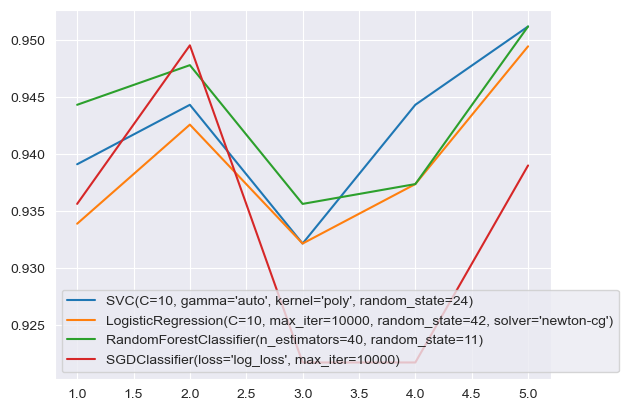

In [7]:
x_train,x_test,y_train,y_test =preprecess_classifier(data=data)

In [8]:
#using the GridSearchCV to select the best hyperparameters

clf_svm = svm.SVC( random_state=24,C=10,gamma='auto')
clf_svm_hp =GridSearchCV(clf_svm,{'C':[0.1,10,100],"gamma":['scale','auto'],'decision_function_shape':['ovo','ovr']},cv=5,return_train_score=True)
clf_svm_hp.fit(x_train,y_train)
df_hp=pd.DataFrame(clf_svm_hp.cv_results_)
df_hp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_gamma,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.130067,0.005699,0.051169,0.005121,0.1,ovo,scale,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",0.568696,0.566957,...,0.566805,0.008903,5,0.570248,0.565898,0.565463,0.563723,0.566522,0.566371,0.002150
1,0.099154,0.000390,0.043898,0.000229,0.1,ovo,auto,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",0.499130,0.499130,...,0.499304,0.000348,7,0.500217,0.500217,0.500217,0.500217,1.000000,0.600174,0.199913
2,0.125168,0.001372,0.047956,0.000417,0.1,ovr,scale,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.568696,0.566957,...,0.566805,0.008903,5,0.570248,0.565898,0.565463,0.563723,0.566522,0.566371,0.002150
3,0.100738,0.001053,0.044368,0.000529,0.1,ovr,auto,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.499130,0.499130,...,0.499304,0.000348,7,0.500217,0.500217,0.500217,0.500217,1.000000,0.600174,0.199913
4,0.072897,0.001038,0.027686,0.000324,10,ovo,scale,"{'C': 10, 'decision_function_shape': 'ovo', 'g...",0.895652,0.902609,...,0.901183,0.005760,3,0.902566,0.901261,0.905176,0.898217,0.901304,0.901705,0.002250
5,0.105430,0.002896,0.044534,0.000376,10,ovo,auto,"{'C': 10, 'decision_function_shape': 'ovo', 'g...",0.499130,0.499130,...,0.499304,0.000348,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.072279,0.000433,0.027726,0.000259,10,ovr,scale,"{'C': 10, 'decision_function_shape': 'ovr', 'g...",0.895652,0.902609,...,0.901183,0.005760,3,0.902566,0.901261,0.905176,0.898217,0.901304,0.901705,0.002250
7,0.105226,0.003081,0.044907,0.001126,10,ovr,auto,"{'C': 10, 'decision_function_shape': 'ovr', 'g...",0.499130,0.499130,...,0.499304,0.000348,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.047198,0.000718,0.016070,0.000106,100,ovo,scale,"{'C': 100, 'decision_function_shape': 'ovo', '...",0.926957,0.930435,...,0.928324,0.007879,1,0.926490,0.928230,0.932579,0.924750,0.928261,0.928062,0.002604
9,0.105508,0.003157,0.045193,0.000786,100,ovo,auto,"{'C': 100, 'decision_function_shape': 'ovo', '...",0.499130,0.499130,...,0.499304,0.000348,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [9]:
clf_rf = RandomForestClassifier(random_state=11,n_estimators=40)
clf_rf_hp =GridSearchCV(clf_rf,{"n_estimators":[30,40,50,60,70,80,90,100],"criterion":['entropy','log_loss'],'max_features':['sqrt','log2',],'class_weight':['balanced', 'balanced_subsample']},cv=5,return_train_score=True)
clf_rf_hp.fit(x_train,y_train)
df_hp=pd.DataFrame(clf_rf_hp.cv_results_)
df_hp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.097350,0.006852,0.002823,0.000082,balanced,entropy,sqrt,30,"{'class_weight': 'balanced', 'criterion': 'ent...",0.942609,...,0.940156,0.006354,61,0.999130,0.999130,0.998695,0.999130,0.999130,0.999043,1.740266e-04
1,0.129603,0.008660,0.005559,0.004333,balanced,entropy,sqrt,40,"{'class_weight': 'balanced', 'criterion': 'ent...",0.940870,...,0.940156,0.006630,57,0.999565,0.999565,0.999565,0.999565,0.999565,0.999565,7.564726e-08
2,0.158963,0.007248,0.004125,0.000261,balanced,entropy,sqrt,50,"{'class_weight': 'balanced', 'criterion': 'ent...",0.939130,...,0.941896,0.005751,25,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,0.187029,0.004289,0.004553,0.000088,balanced,entropy,sqrt,60,"{'class_weight': 'balanced', 'criterion': 'ent...",0.940870,...,0.941547,0.004456,41,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,0.217616,0.009399,0.004983,0.000078,balanced,entropy,sqrt,70,"{'class_weight': 'balanced', 'criterion': 'ent...",0.942609,...,0.941894,0.004184,29,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.201301,0.001834,0.004334,0.000071,balanced_subsample,log_loss,log2,60,"{'class_weight': 'balanced_subsample', 'criter...",0.939130,...,0.941548,0.004312,37,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
60,0.234833,0.001649,0.004898,0.000018,balanced_subsample,log_loss,log2,70,"{'class_weight': 'balanced_subsample', 'criter...",0.940870,...,0.942940,0.004557,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
61,0.269781,0.003510,0.005519,0.000113,balanced_subsample,log_loss,log2,80,"{'class_weight': 'balanced_subsample', 'criter...",0.937391,...,0.942593,0.006752,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
62,0.306493,0.006991,0.006047,0.000121,balanced_subsample,log_loss,log2,90,"{'class_weight': 'balanced_subsample', 'criter...",0.933913,...,0.942246,0.007858,13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


# RandomForestClassifier

the accuracy of model run with train data 1.0
the accuracy of model run with test data 0.9471488178025035


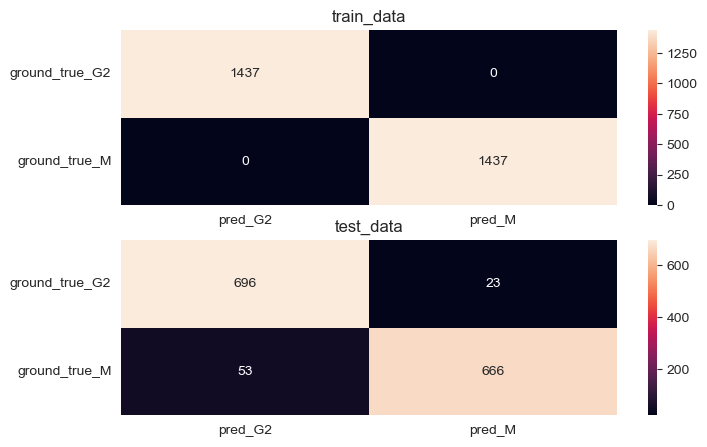

In [12]:
clf_rf_hp = RandomForestClassifier(random_state=11,n_estimators=70,max_features='sqrt',criterion='entropy',class_weight='balanced')
check_classifier(clf=clf_rf_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

# SVM

the accuracy of model run with train data 0.9707724425887265
the accuracy of model run with test data 0.9478442280945758


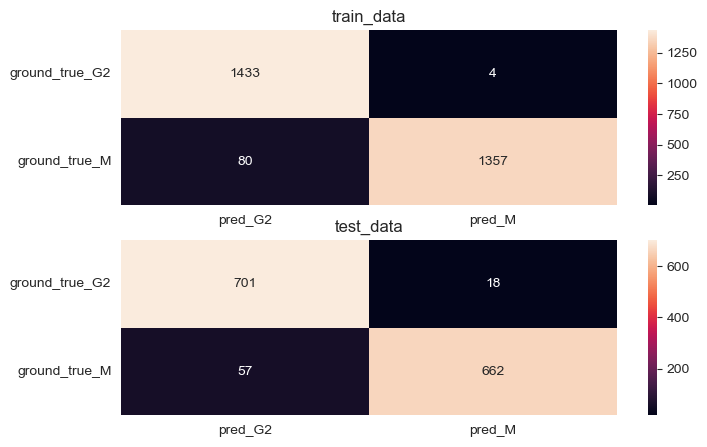

In [13]:
clf_svm_hp = svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo')
check_classifier(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)